In [64]:
import numpy as np
import tensorflow as tf
import deepxde as dde

In [65]:
import os
os.chdir('../')
from function import make_data

In [66]:
df = make_data(dt = 1, total_time = 10000)

In [107]:
train_df = df.iloc[:9000,:]

In [108]:
geom = dde.geometry.TimeDomain(0, 10000)
ic = dde.IC(geom, lambda X: df['u'], lambda _, on_initial: on_initial)

In [109]:
t = train_df['time'].values[:, None]
u = train_df['u'].values
f = train_df['f'].values

def func(t):
    u = np.interp(t, data_df['time'], data_df['u'])
    f = np.interp(t, data_df['time'], data_df['f'])
    return u, f

In [110]:
def input_transform(t):
    u_2d = tf.reshape(u, [-1, 1])  # Convert u to 2D tensor
    u_2d_float32 = tf.cast(u_2d, tf.float32)  # Convert u's data type to float32
    return tf.concat([u_2d_float32, t], axis=1)


In [111]:
alpha, beta, gamma = [-45.93857163, 117.18149753,  63.07236099]

In [112]:
def bouc_wen(_, u):
    z = u
    du_dt = -alpha * z - beta * z * tf.abs(z) - gamma * z**2
    return [du_dt]


In [122]:
data = dde.data.PDE(
    geom,
    bouc_wen,
    bcs=[],
    num_domain=9000,
    num_boundary=0,
    solution=None,
    num_test=0,
    train_distribution="uniform",
)


In [123]:
import matplotlib.pyplot as plt

In [124]:
data.train_x.shape

(9000, 1)

In [125]:
net = dde.maps.FNN([1] + [200] * 2 + [1], "sin", "Glorot normal")

In [126]:
net.apply_feature_transform(input_transform)

In [127]:
model = dde.Model(data, net)

In [128]:
model.compile("L-BFGS", lr=0.001)

Compiling model...
Building feed-forward neural network...
'build' took 0.065375 s



'compile' took 0.273335 s



In [130]:
losshistory, train_state = model.train(epochs=15000)

Training model...



InvalidArgumentError: Graph execution error:

Detected at node 'concat_10' defined at (most recent call last):
    File "c:\Users\user\anaconda3\envs\crawling\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\user\anaconda3\envs\crawling\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\traitlets\config\application.py", line 1041, in launch_instance
      app.start()
    File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\user\anaconda3\envs\crawling\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\user\anaconda3\envs\crawling\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\user\anaconda3\envs\crawling\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\ipykernel\zmqshell.py", line 530, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\IPython\core\interactiveshell.py", line 2945, in run_cell
      result = self._run_cell(
    File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\IPython\core\interactiveshell.py", line 3000, in _run_cell
      return runner(coro)
    File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\IPython\core\interactiveshell.py", line 3203, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\IPython\core\interactiveshell.py", line 3382, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\user\AppData\Local\Temp\ipykernel_16288\2782303568.py", line 1, in <module>
      model.compile("L-BFGS", lr=0.001)
    File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\deepxde\utils\internal.py", line 22, in wrapper
      result = f(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\deepxde\model.py", line 132, in compile
      self._compile_tensorflow_compat_v1(lr, loss_fn, decay, loss_weights)
    File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\deepxde\model.py", line 149, in _compile_tensorflow_compat_v1
      self.net.build()
    File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\deepxde\utils\internal.py", line 22, in wrapper
      result = f(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py", line 64, in build
      y = self._input_transform(y)
    File "C:\Users\user\AppData\Local\Temp\ipykernel_16288\646979182.py", line 4, in input_transform
      return tf.concat([u_2d_float32, t], axis=1)
Node: 'concat_10'
ConcatOp : Dimension 0 in both shapes must be equal: shape[0] = [9000,1] vs. shape[1] = [0,1]
	 [[{{node concat_10}}]]

Original stack trace for 'concat_10':
  File "c:\Users\user\anaconda3\envs\crawling\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\user\anaconda3\envs\crawling\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\traitlets\config\application.py", line 1041, in launch_instance
    app.start()
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
    self.asyncio_loop.run_forever()
  File "c:\Users\user\anaconda3\envs\crawling\lib\asyncio\base_events.py", line 601, in run_forever
    self._run_once()
  File "c:\Users\user\anaconda3\envs\crawling\lib\asyncio\base_events.py", line 1905, in _run_once
    handle._run()
  File "c:\Users\user\anaconda3\envs\crawling\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
    await self.process_one()
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
    await dispatch(*args)
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
    await result
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
    reply_content = await reply_content
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
    res = shell.run_cell(
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\ipykernel\zmqshell.py", line 530, in run_cell
    return super().run_cell(*args, **kwargs)
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\IPython\core\interactiveshell.py", line 2945, in run_cell
    result = self._run_cell(
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\IPython\core\interactiveshell.py", line 3000, in _run_cell
    return runner(coro)
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
    coro.send(None)
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\IPython\core\interactiveshell.py", line 3203, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\IPython\core\interactiveshell.py", line 3382, in run_ast_nodes
    if await self.run_code(code, result, async_=asy):
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\user\AppData\Local\Temp\ipykernel_16288\2782303568.py", line 1, in <module>
    model.compile("L-BFGS", lr=0.001)
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\deepxde\utils\internal.py", line 22, in wrapper
    result = f(*args, **kwargs)
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\deepxde\model.py", line 132, in compile
    self._compile_tensorflow_compat_v1(lr, loss_fn, decay, loss_weights)
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\deepxde\model.py", line 149, in _compile_tensorflow_compat_v1
    self.net.build()
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\deepxde\utils\internal.py", line 22, in wrapper
    result = f(*args, **kwargs)
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py", line 64, in build
    y = self._input_transform(y)
  File "C:\Users\user\AppData\Local\Temp\ipykernel_16288\646979182.py", line 4, in input_transform
    return tf.concat([u_2d_float32, t], axis=1)
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\tensorflow\python\util\dispatch.py", line 1176, in op_dispatch_handler
    return dispatch_target(*args, **kwargs)
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1839, in concat
    return gen_array_ops.concat_v2(values=values, axis=axis, name=name)
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1524, in concat_v2
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 795, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "c:\Users\user\anaconda3\envs\crawling\lib\site-packages\tensorflow\python\framework\ops.py", line 3814, in _create_op_internal
    ret = Operation(


In [100]:
dde.saveplot(losshistory, train_state, issave=False, isplot=True)

NameError: name 'losshistory' is not defined

In [ ]:
import matplotlib.pyplot as plt

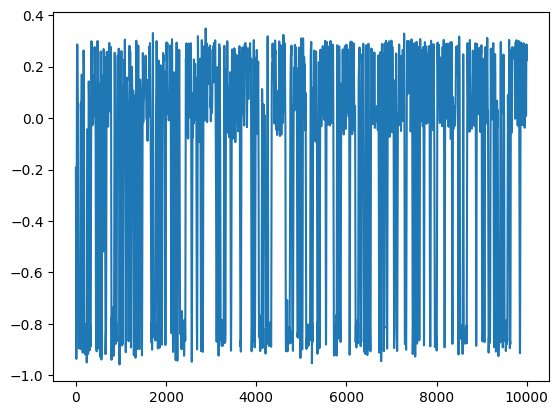

In [ ]:
plt.plot(model.predict(t))